In [1]:
import sqlite3
import pandas
import matplotlib.pyplot as plt

conn = sqlite3.connect('db.sqlite3')
data = conn.execute("""
select commune.name, income, commune.population, sum(data.value) * 100 / commune.population as value
from commune
join data on commune.id = data.commune_id
join report on data.report_id = report.id
where report.description = 'Ingresos Programa de Salud Mental por mes y año'
  and commune.income is not null
group by commune.id
""").fetchall()

# drop unixtimestamp
data = pandas.DataFrame(data, columns=['commune', 'income', 'population', 'value'])
data

,commune,income,population,value
0,SAN JOAQUIN,772440,94492,23
1,SAN MIGUEL,1158765,107954,11
2,SAN RAMON,657161,82900,18
3,INDEPENDENCIA,718622,100281,16
4,LA CISTERNA,863400,90119,18
5,PENALOLEN,1025659,241599,22
6,PROVIDENCIA,1797751,142079,12
7,LA REINA,1587617,92787,6
8,CALERA DE TANGO,882261,25392,6
9,COLINA,1281069,146207,13


In [2]:
# correlation
data.drop(columns=['commune']).corr()

,income,population,value
income,1.000000,0.124125,-0.492867
population,0.124125,1.000000,-0.337314
value,-0.492867,-0.337314,1.000000


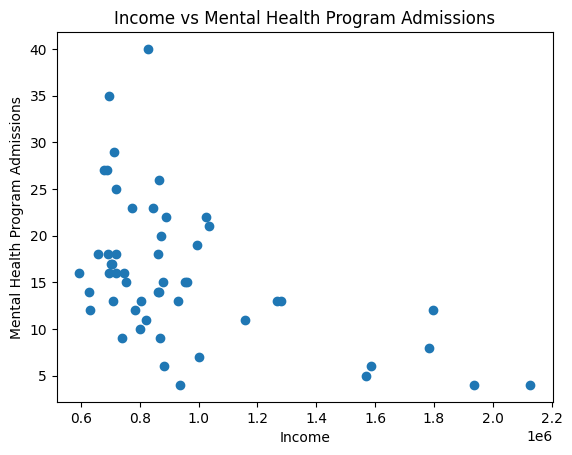

In [3]:
# plot income vs value
plt.scatter(data['income'], data['value'])
plt.xlabel('Income')
plt.ylabel('Mental Health Program Admissions')
plt.title('Income vs Mental Health Program Admissions')
plt.savefig('img/income_vs_mental_health_admissions.png')
plt.show()